## Market Analysis - E-Learning Company

An e-learning company, with courses on programming in the tech space, is looking to advertise their course directory.
This project is aimed at exploring the best markets to advertise their product.

Our data is gotten from freeCodeCamp's 2017 New Coder Survey which has participants of various programming interests. [GitHub Link](https://github.com/freeCodeCamp/2017-new-coder-survey)

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [33]:
survey_df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=0)

In [34]:
survey_df.info()
survey_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


With 18175 rows and 136 columns, this dataset covers a diverse range of individuals with questions on their programming interests (present & future) as well as their experience in general

## Learning Interests

For the purpose of our analysis, we are interested in understanding what these 'coders' are interested in learning, where they are, and how much they are willing to spend on leaning

In [35]:
survey_df['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

From the table above, we see that all aspects of web development are prominent in the learners' interests, mobile development and data related paths are also relatively frequent. However, fewer respondents are interested in only one subject, with some having more than five stated interests. Splitting the values is needed to go deeper into analyzing the column.

In [36]:
interests_no_nulls = survey_df['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

n_of_options = splitted_interests.apply(lambda x: len(x))
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Only about 31% of the total participants have a single subject in mind, this can be ideal for the e-learning company as a varied course directory will attract a large amount of people. THe e-learning company has most of their courses revolving around web and mobile development, we will next look into exactly how many people are interested in this.

In [37]:
web_or_mobile = interests_no_nulls.str.contains('Web Developer|Mobile Developer') 
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


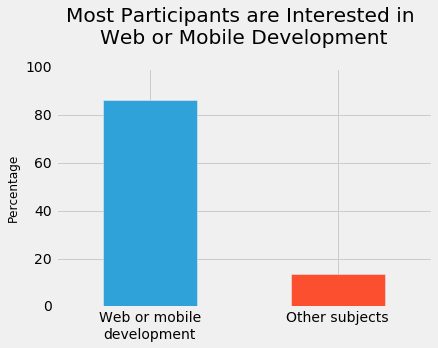

In [38]:
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development', y = 1.08)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subjects'], rotation = 0)
plt.ylim([0,100])
plt.show()

From this, we can see that about 86% of the participants have stated an interest in learning either web or mobile development. 
This shows there is a market for e-learning products in this space, therefore we can move on to finding the best method of entry

## Market Location and Density

In order to streamline our advertising efforts, it would be beneficial to know where exactly our customers are, how many can we expect, as well as predicting the return on investment.
Therefore, we'll be looking at:
 - Where are these new coders located.
 - What are the locations with the greatest number of new coders.
 - How much money new coders are willing to spend on learning.

In [39]:
rep_survey = survey_df[survey_df["JobRoleInterest"].notnull()].copy()

abs_freq = rep_survey["CountryLive"].value_counts()
rel_freq = rep_survey["CountryLive"].value_counts(normalize=True)*100

pd.DataFrame(data= {"Absolute Frequencies": abs_freq, "Relative Frequencies": rel_freq})

,Absolute Frequencies,Relative Frequencies
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


The United States of America comes up first as the location of 45% of our representative dataset, with India coming immediately after it.

## Money Spent on Learning

We move on to figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for the company.

We have a "MoneyForLearning" column and a "MonthsProgramming" column. We can use these to find out how much is spent monthly on learning to code.

In [40]:
rep_survey["MoneyForLearning"].value_counts()

0.0         3194
100.0        434
200.0        315
500.0        232
50.0         227
1000.0       192
300.0        146
20.0         134
150.0         98
2000.0        96
400.0         94
30.0          85
10.0          69
5000.0        68
60.0          54
3000.0        51
40.0          50
1500.0        49
600.0         49
250.0         46
15.0          45
10000.0       33
4000.0        31
25.0          26
1200.0        23
800.0         22
20000.0       22
80.0          21
2500.0        21
70.0          20
            ... 
230.0          1
420.0          1
69000.0        1
27000.0        1
22000.0        1
80000.0        1
53.0           1
4200.0         1
200000.0       1
2040.0         1
520.0          1
99.0           1
720.0          1
833.0          1
431.0          1
490.0          1
165.0          1
50000.0        1
120000.0       1
660.0          1
175.0          1
3975.0         1
335.0          1
9100.0         1
6300.0         1
13500.0        1
2600.0         1
16500.0       

In [41]:
rep_survey["MonthsProgramming"].value_counts()

1.0      767
2.0      669
6.0      654
3.0      637
12.0     616
24.0     422
4.0      367
5.0      279
36.0     251
0.0      235
8.0      195
18.0     160
10.0     144
7.0      124
48.0     112
9.0      102
20.0      92
30.0      82
60.0      79
14.0      76
15.0      70
16.0      58
40.0      43
11.0      39
13.0      36
50.0      29
72.0      28
17.0      20
26.0      17
28.0      13
        ... 
31.0       2
38.0       2
33.0       2
108.0      2
480.0      2
75.0       2
69.0       1
56.0       1
73.0       1
41.0       1
83.0       1
89.0       1
111.0      1
124.0      1
46.0       1
408.0      1
300.0      1
370.0      1
264.0      1
58.0       1
86.0       1
180.0      1
43.0       1
190.0      1
113.0      1
49.0       1
171.0      1
198.0      1
105.0      1
51.0       1
Name: MonthsProgramming, Length: 91, dtype: int64

From the values, we can see that some transformation is needed as a zero value in each column is not beneficial.

In [44]:
rep_survey["MonthsProgramming"].replace(0,1, inplace=True)
rep_survey["money_per_month"] = rep_survey["MoneyForLearning"]/rep_survey["MonthsProgramming"]
rep_survey["money_per_month"].isnull().sum()

675

In [45]:
rep_survey = rep_survey[rep_survey["money_per_month"].notnull()]

Next, we'll add in our previous analysis of location in order to see the amount of money spent by students on average in our largest geographical markets (US, India, UK and Canada) 

In [46]:
rep_survey = rep_survey[rep_survey['CountryLive'].notnull()]

rep_survey['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [47]:
countries_mean = rep_survey.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

Looking at the results we see the US, India and Canada as the markets with the highest paying students. The UK suprisingly has a fewer number of students willing to pay well to learn.
More visualization might be necessary to dig into the values

## Visualizations

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



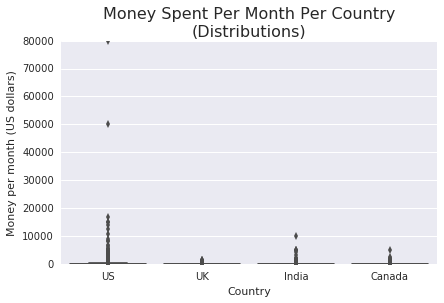

In [50]:
only_4 = rep_survey[rep_survey['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month \$50000 or more for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over \$20,000 per month.

In [51]:
rep_survey = rep_survey[rep_survey['money_per_month'] < 20000]

In [52]:
countries_mean = rep_survey.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



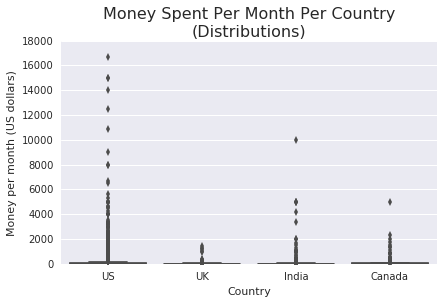

In [54]:
only_4 = rep_survey[rep_survey['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We can see a few extreme outliers for India (values over \$2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

In [55]:
india_outliers = only_4[(only_4['CountryLive'] == 'India') & (only_4['money_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


As all outliers here did not attend any bootcamp that might explain their high numbers, it might be safer to drop these participants from the dataset.

In [56]:
only_4 = only_4.drop(india_outliers.index)

Looking back at the box plot above, we can also see more extreme outliers for the US (values over \$6000 per month). Let's examine these participants in more detail.

In [57]:
us_outliers = only_4[(only_4['CountryLive'] == 'United States of America') & (only_4['money_per_month'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend \$6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In [58]:
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]

only_4 = only_4.drop(no_bootcamp.index)


less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)

Moving on to the outlier in the Canada boxplot

In [60]:
canada_outliers = only_4[(only_4['CountryLive'] == 'Canada') & (only_4['money_per_month'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In [61]:
only_4 = only_4.drop(canada_outliers.index)

In [62]:
only_4.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



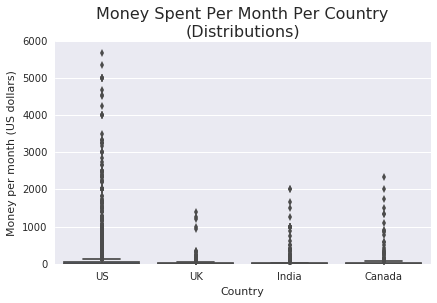

In [63]:
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
plt.show()

## Conclusion

The US is a clear choice as a market for our product as it leads both in number of new coders as well as the amount individals are willing to pay to learn.
While a choice between India and Canada can be made as one (India) has a higher number of new coders while the other has a higher average for money spent on learning.
The UK is not a particularly good market for our e-learning company as a \$59 per month subscription is higher than the average individuals in that country are willing to pay (\$45.5)

As such for the marketing team there are three potential markets, and advertising in all three is likely to bring favourable results.